In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("kidney.csv")

In [2]:
data.shape

(400, 14)

In [3]:
data.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [4]:
data.head(5)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


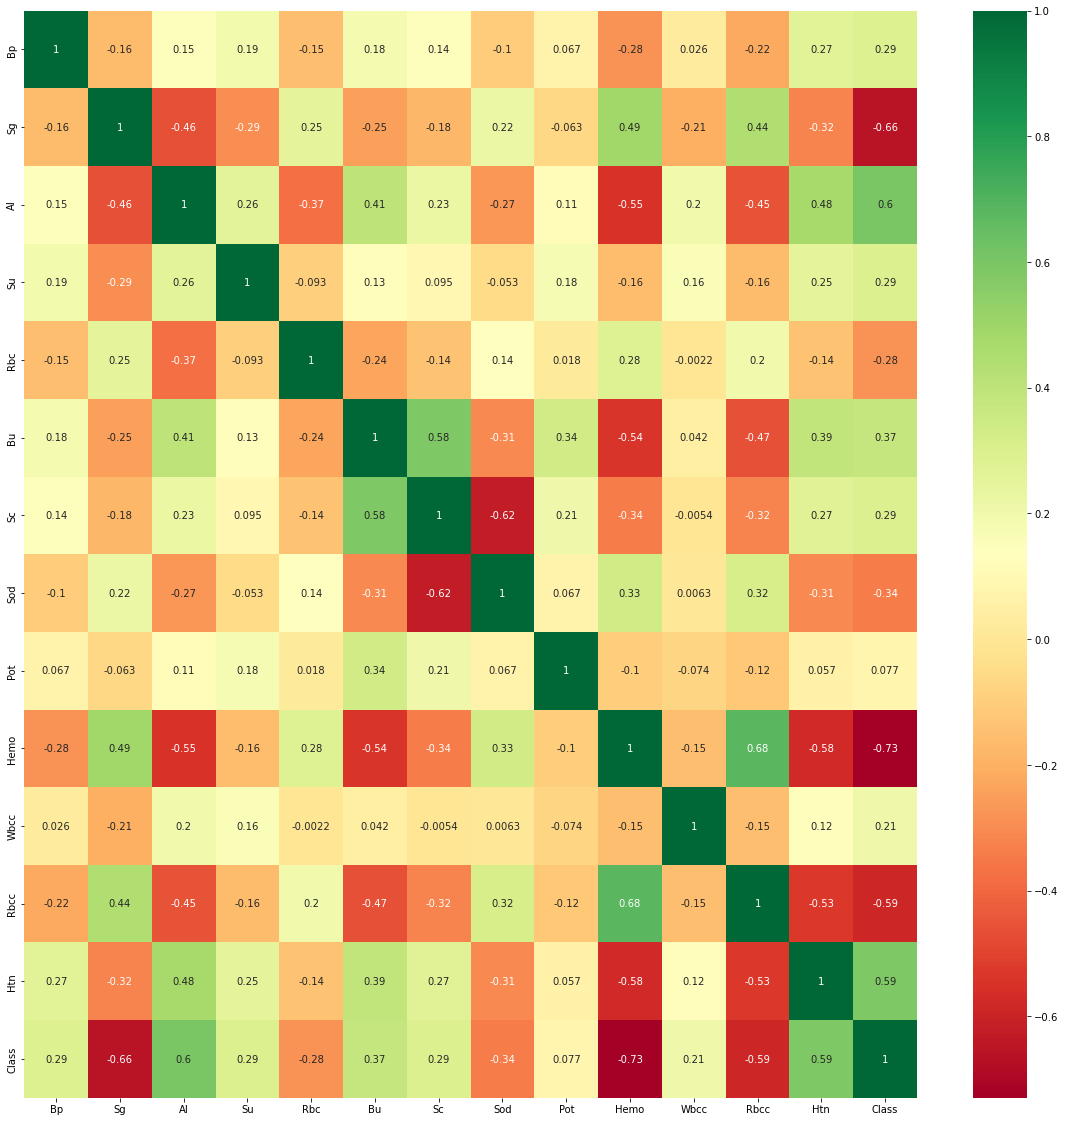

In [5]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [6]:
data['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
feature_columns = ['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod','Pot','Hemo','Wbcc','Rbcc','Htn']
predicted_class = ['Class']

X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.992


In [10]:
import pickle

In [11]:
filename='kidney_disease.sav'
pickle.dump(random_forest_model,open(filename,'wb'))

In [12]:
loaded_model=pickle.load(open('kidney_disease.sav','rb'))

In [9]:
##input from user
Bp= float(input("Enter Bp:"))
Sg= float(input("Enter Sg:"))
Al= float(input("Enter Al:"))
Su= float(input("Enter Su:"))
Rbc= float(input("Enter Rbc:"))
Bu= float(input("Enter Bu:"))
Sc= float(input("Enter Sc:"))
Sod= float(input("Enter Sod:"))
Pot= float(input("Enter Pot:"))
Hemo= float(input("Enter Hemo:"))
Wbcc= float(input("Enter Wbcc:"))
Rbcc= float(input("Enter Rbcc:"))
Htn= float(input("Enter Htn:"))

user_input=[Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn]

result = random_forest_model.predict([user_input])[0]
if(result==1):
    print("Patient May Develop Kidney Disease")
else:
    print("Patient is at not at risk of Kidney Disease")

KeyboardInterrupt: Interrupted by user